In [38]:
import numpy             as np
import scipy             as sp
import pandas            as pd
import scipy.optimize    as op
import matplotlib.pyplot as plt

import io
from scipy.interpolate import UnivariateSpline

In [219]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last_expr"

In [220]:
def save_table(df, name, fmt = {}):
    latex = df.style.hide(level=0, axis=0).format(fmt).to_latex()
    with open(name, 'w') as file:
        file.write('\n'.join(latex.splitlines()[2:-1])[:-2])

In [236]:
mnk_fmt = {
        '$\overline{x}$' : "{:.2e}",
        '$\sigma_x^2$'   : "{:.2e}",
        '$\overline{y}$' : "{:.2f}",
        '$\sigma_y^2$'   : "{:.2e}",
        '$r_{xy}$'       : "{:.2e}",
        '$a$'            : "{:.2f}",
        '$\Delta a$'     : "{:.2f}",
        '$b$'            : "{:.2f}",
        '$\Delta b$'     : "{:.2f}",
}

def mnk(x, y):
    sx = (x**2).mean() - (x.mean())**2
    sy = (y**2).mean() - (y.mean())**2
    rxy = (y*x).mean() - (y.mean() * x.mean())
    a = rxy / sx
    da = (1/(len(x) - 2) * (sy/sx - a**2))**(0.5)
    b = y.mean() - a * x.mean()
    db = da*(sx + (x.mean())**2)**(1/2)
    dat = pd.DataFrame({
        '$\overline{x}$' : [x.mean()],
        '$\sigma_x^2$'   : [sx],
        '$\overline{y}$' : [y.mean()],
        '$\sigma_y^2$'   : [sy],
        '$r_{xy}$'       : [rxy],
        '$a$'            : [a],
        '$\Delta a$'     : [da],
        '$b$'            : [b],
        '$\Delta b$'     : [db],
    })
    return dat#, [x.mean(), sx, y.mean(), sy, rxy, a, da, b, db]

In [222]:
d3 = pd.read_excel(f"data/330.xlsx")
d4 = pd.read_excel(f"data/450.xlsx")
d5 = pd.read_excel(f"data/550.xlsx")

In [223]:
ignore = ()

In [224]:
T = lambda x: np.delete(np.array(x['t'], dtype=np.double), ignore)
L = lambda x: np.delete(np.array(x['l'], dtype=np.double), ignore) * 9.8067 * 0.2 * 0.9932
V = lambda x: np.delete(np.array(x['v'], dtype=np.double), ignore)

In [225]:
Q = lambda x: V(x) / T(x)

5mm = [ 0.00204564 -0.00179758]
   $\overline{x}$  $\sigma_x^2$  $\overline{y}$  $\sigma_y^2$  $r_{xy}$       $a$  $\Delta a$       $b$  $\Delta b$
0       34.090051    276.697987        0.067938      0.001159  0.566023  0.002046    0.000035 -0.001798    0.001315
4mm = [ 0.00060958 -0.00110835]
   $\overline{x}$  $\sigma_x^2$  $\overline{y}$  $\sigma_y^2$  $r_{xy}$      $a$  $\Delta a$       $b$  $\Delta b$
0       67.855434   1138.941619        0.040255      0.000424  0.694277  0.00061     0.00001 -0.001108     0.00074
3mm = [0.00034108 0.00098605]
   $\overline{x}$  $\sigma_x^2$  $\overline{y}$  $\sigma_y^2$  $r_{xy}$       $a$  $\Delta a$       $b$  $\Delta b$
0       65.745097    1409.18332        0.023411      0.000165  0.480647  0.000341    0.000009  0.000986    0.000719


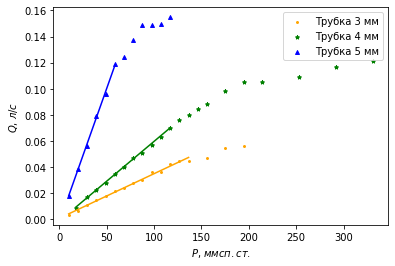

In [239]:
SIZE = 15
ignore = ()
plt.scatter(L(d3), Q(d3), label='Трубка 3 мм', s=SIZE, marker='.', c='orange')
plt.scatter(L(d4), Q(d4), label='Трубка 4 мм', s=SIZE, marker='*', c='green')
plt.scatter(L(d5), Q(d5), label='Трубка 5 мм', s=SIZE, marker='^', c='blue')

f = lambda t: p[0]*t + p[1]

ignore5 = ignore = (range(5, 11))
p = np.polyfit(L(d5), Q(d5), 1)
t = np.linspace(L(d5).min(), L(d5).max())
plt.plot(t, f(t), c='blue')
print("5mm =", p)
print(mnk(L(d5), Q(d5)).to_string())

ignore4 = ignore = (range(6, 21))
p = np.polyfit(L(d4), Q(d4), 1)
t = np.linspace(L(d4).min(), L(d4).max())
plt.plot(t, f(t), c='green')
print("4mm =", p)
print(mnk(L(d4), Q(d4)).to_string())

ignore3 = ignore = (range(12, 17))
p = np.polyfit(L(d3), Q(d3), 1)
t = np.linspace(L(d3).min(), L(d3).max())
plt.plot(t, f(t), c='orange')
print("3mm =", p)
print(mnk(L(d3), Q(d3)).to_string())


plt.xlabel(r"$P$, $мм сп.ст.$")
plt.ylabel(r"$Q$, $л / с$")

plt.legend()
plt.savefig('QdP.pdf')

In [243]:
 0.000009 /0.000341

0.026392961876832845

In [195]:
ignore = ()
export = lambda x: pd.DataFrame({
    't' : T(x).tolist(),
    'v' : V(x).tolist(),
    'q' : Q(x).tolist(),
    'p' : L(x).tolist(),
})

fmt = {
    't' : "{:.2f}",
    'v' : "{:.2f}",
    'q' : "{:.4f}",
    'p' : "{:.2f}",
}

save_table(export(d3), 'tab3.tex', fmt)
save_table(export(d4), 'tab4.tex', fmt)
save_table(export(d5), 'tab5.tex', fmt)

In [244]:
0.05/3.95

0.012658227848101266

In [196]:
eta = lambda R, l, A: 3.14 * (R/2)**4 / (8 * l * A * 1e-3)

In [246]:
eta3 = eta(3e-3, 0.3, 0.00034108 )
eta3

0.09709507300340095

In [248]:
eta4 = eta(3.95e-3, 0.5, 0.00060958 )
eta4 * 0.05 *1e5

0.09796644559894212

In [247]:
eta5 = eta(5.10e-3, 0.5, 0.00204564)
eta5 * 0.05 *1e5

0.08112807582529187

In [200]:
p3 = pd.read_excel(f"data/3.xlsx")
p4 = pd.read_excel(f"data/4.xlsx")
p5 = pd.read_excel(f"data/5.xlsx")

In [201]:
X = lambda x: np.delete(np.array(x['x'], dtype=np.double), ignore)

In [202]:
ignore = ()
export = lambda x: pd.DataFrame({
    'x' : X(x).tolist(),
    'p' : L(x).tolist(),
})

fmt = {
    'p' : "{:.2f}",
    'x' : "{:.2f}",
}

save_table(export(p3), 'ptab3.tex', fmt)
save_table(export(p4), 'ptab4.tex', fmt)
save_table(export(p5), 'ptab5.tex', fmt)

3mm = [ 3.24667148 86.36146137]
4mm = [ 2.68888267 58.23953815]
5mm = [ 0.97400144 49.96627408]


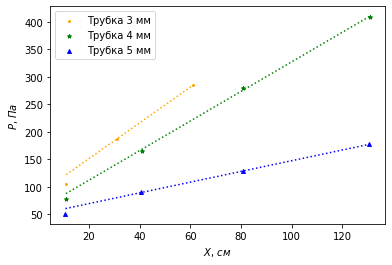

In [234]:
SIZE = 15
ignore = ()
plt.scatter(X(p3), L(p3), label='Трубка 3 мм', s=SIZE, marker='.', c='orange')
plt.scatter(X(p4), L(p4), label='Трубка 4 мм', s=SIZE, marker='*', c='green')
plt.scatter(X(p5), L(p5), label='Трубка 5 мм', s=SIZE, marker='^', c='blue')

f = lambda t: p[0]*t + p[1]

ignore = (0)
p = np.polyfit(X(p3), L(p3), 1)
ignore = ()
t = np.linspace(X(p3).min(), X(p3).max())
plt.plot(t, f(t), ':', c='orange')
print("3mm =", p)

ignore = (0)
p = np.polyfit(X(p4), L(p4), 1)
ignore = ()
t = np.linspace(X(p4).min(), X(p4).max())
plt.plot(t, f(t),':', c='green')
print("4mm =", p)

ignore = (0)
p = np.polyfit(X(p5), L(p5), 1)
ignore = ()
t = np.linspace(X(p5).min(), X(p5).max())
plt.plot(t, f(t),':', c='blue')
print("5mm =", p)

plt.xlabel(r"$X$, $см$")
plt.ylabel(r"$P$, $Па$")

plt.legend()
plt.savefig('PX.pdf')

In [104]:
lineary = lambda x, l, eta: np.log(Q(x) / L(x) * eta * l)
linearx = lambda x, r: np.full(Q(x).size, np.log(r))

[3.81402063 2.16222292]
   $\overline{x}$  $\sigma_x^2$  $\overline{y}$  $\sigma_y^2$  $r_{xy}$       $a$  $\Delta a$       $b$  $\Delta b$
0        -5.60771      0.048737      -19.225699      0.711242  0.185883  3.814021    0.046102  2.162223    0.258724


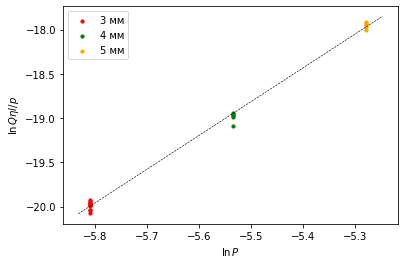

In [233]:
ignore = ()

SIZE = 10
f = lambda t: p[0]*t + p[1]

ignore = ignore3
x3 = linearx(d3, 3e-3)
y3 = lineary(d3, 0.3, eta3)
plt.scatter(x3, y3, s=SIZE, label="3 мм", c='r')

ignore = ignore4
x4 = linearx(d4, 3.95e-3)
y4 = lineary(d4, 0.5, eta4)
plt.scatter(x4, y4, s=SIZE, label="4 мм", c='g')

ignore = ignore5
x5 = linearx(d5, 5.1e-3)
y5 = lineary(d5, 0.5, eta5)
plt.scatter(x5, y5, s=SIZE, label="5 мм", c='orange')

x = np.concatenate((x3, x4, x5))
y = np.concatenate((y3, y4, y5))

t = np.linspace(x.min() * 1.004, x.max() * 0.994)
p = np.polyfit(x, y, 1)

plt.plot(t, f(t), '--', c='black', linewidth=0.6)
print(p)
print(mnk(x, y).to_string())

plt.ylabel(r"$\ln{Q \eta l/p}$")
plt.xlabel(r"$\ln{P}$")

plt.legend()
plt.savefig('LN.pdf')

fmt = {
    'x' : "{:.3f}",
    'y' : "{:.3f}",
}

save_table(pd.DataFrame({
    'x' : x,
    'y' : y
}), 'lntab.tex', fmt)

In [253]:
0.05e-3 * 1.2 / (3.14 * 1.94e-5 * (3e-3/2)) 


656.6419331538511

In [254]:
0.07e-3 * 1.2 / (3.14 * 1.96e-5 * (3.95e-3/2)) 

691.0770435724075

In [257]:
0.12e-3 * 1.2 / (3.14 * 1.62e-5 * (5.1e-3/2)) 

1110.1397388396263

In [258]:
0.2 * 656 * 3e-3

0.39360000000000006

In [259]:
0.2 * 691 * 3.9e-3

0.53898

In [261]:
1110 * 5.1e-3 * 0.2 /2

0.5661